In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
accra_df = pd.read_csv('accra_weather.csv')
kumasi_df = pd.read_csv('kumasi_weather.csv')
print(accra_df)

          Date  Temperature  Rainfall  Humidity   City
0   2023-01-01         26.7      11.6      79.2  Accra
1   2023-01-11         34.4      12.0      89.6  Accra
2   2023-01-21         26.5       5.3      67.8  Accra
3   2023-01-31         35.0       5.7      84.1  Accra
4   2023-02-10         29.9       5.1      86.1  Accra
5   2023-02-20         31.3       6.6      87.7  Accra
6   2023-03-02         33.2       2.9      60.1  Accra
7   2023-03-12         30.2       3.3      74.1  Accra
8   2023-03-22         27.6      19.3      89.4  Accra
9   2023-04-01         26.3      19.2      72.0  Accra
10  2023-04-11         25.0       3.8      84.4  Accra
11  2023-04-21         32.9       0.5      76.4  Accra
12  2023-05-01         29.3       4.1      83.1  Accra
13  2023-05-11         25.9      14.0      74.5  Accra
14  2023-05-21         34.6      15.6      60.9  Accra
15  2023-05-31         27.3       0.5      62.6  Accra
16  2023-06-10         29.0      11.6      63.3  Accra
17  2023-0

In [3]:
print(kumasi_df)

          Date  Temperature  Rainfall  Humidity    City
0   2023-01-01         34.7      16.5      67.6  Kumasi
1   2023-01-11         28.0       1.1      72.1  Kumasi
2   2023-01-21         33.9      14.4      82.4  Kumasi
3   2023-01-31         24.5      16.0      81.7  Kumasi
4   2023-02-10         25.3      14.7      72.2  Kumasi
5   2023-02-20         31.1      14.2      89.7  Kumasi
6   2023-03-02         30.4      10.8      73.5  Kumasi
7   2023-03-12         29.0       2.5      71.2  Kumasi
8   2023-03-22         28.0      19.2      81.3  Kumasi
9   2023-04-01         31.5       8.1      62.5  Kumasi
10  2023-04-11         29.3       4.3      72.0  Kumasi
11  2023-04-21         32.8      14.3      83.1  Kumasi
12  2023-05-01         30.2      19.9      82.9  Kumasi
13  2023-05-11         30.9       5.1      68.5  Kumasi
14  2023-05-21         31.7      13.4      65.7  Kumasi
15  2023-05-31         35.9      12.0      74.1  Kumasi
16  2023-06-10         33.8      14.3      70.0 

In [7]:
combined_df = pd.concat([accra_df, kumasi_df])
print(combined_df)

          Date  Temperature  Rainfall  Humidity    City
0   2023-01-01         26.7      11.6      79.2   Accra
1   2023-01-11         34.4      12.0      89.6   Accra
2   2023-01-21         26.5       5.3      67.8   Accra
3   2023-01-31         35.0       5.7      84.1   Accra
4   2023-02-10         29.9       5.1      86.1   Accra
5   2023-02-20         31.3       6.6      87.7   Accra
6   2023-03-02         33.2       2.9      60.1   Accra
7   2023-03-12         30.2       3.3      74.1   Accra
8   2023-03-22         27.6      19.3      89.4   Accra
9   2023-04-01         26.3      19.2      72.0   Accra
10  2023-04-11         25.0       3.8      84.4   Accra
11  2023-04-21         32.9       0.5      76.4   Accra
12  2023-05-01         29.3       4.1      83.1   Accra
13  2023-05-11         25.9      14.0      74.5   Accra
14  2023-05-21         34.6      15.6      60.9   Accra
15  2023-05-31         27.3       0.5      62.6   Accra
16  2023-06-10         29.0      11.6      63.3 

In [8]:
combined_df["Date"] = pd.to_datetime(combined_df["Date"])

In [10]:
data = combined_df.groupby("City")
print(data)

In [11]:
average_temp = data["Temperature"].mean()
print(average_temp)

City
Accra     29.694737
Kumasi    30.763158
Name: Temperature, dtype: float64


In [13]:
average_rain = data["Rainfall"].mean()
average_hum = data['Humidity'].mean()

print(average_rain)
print(average_hum)

City
Accra      7.968421
Kumasi    11.921053
Name: Rainfall, dtype: float64
City
Accra     76.405263
Kumasi    74.642105
Name: Humidity, dtype: float64


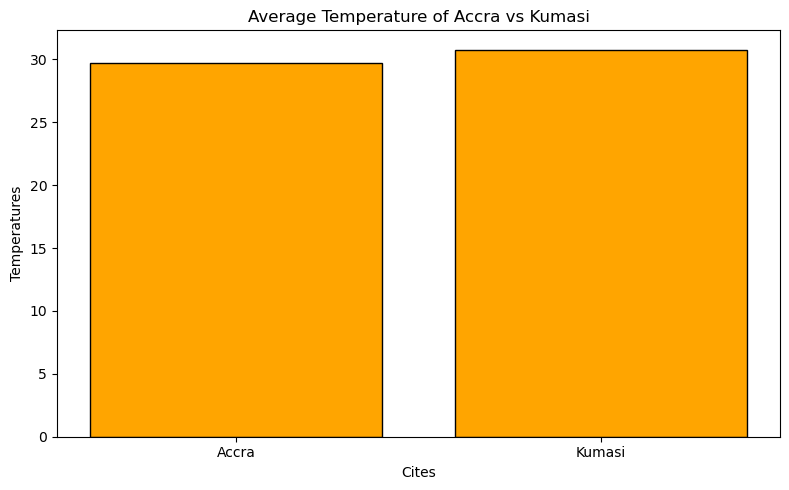

In [18]:
plt.figure(figsize=(8, 5))
plt.bar(average_temp.index, average_temp, color="orange", edgecolor="black")
plt.title("Average Temperature of Accra vs Kumasi")
plt.xlabel("Cites")
plt.ylabel("Temperatures")
plt.tight_layout()
plt.show()

In [21]:
average_cities = pd.DataFrame({
    "Temperature": average_temp,
    "Rainfall": average_rain,
    "Humidity": average_hum
})
print(average_cities)

        Temperature   Rainfall   Humidity
City                                     
Accra     29.694737   7.968421  76.405263
Kumasi    30.763158  11.921053  74.642105


In [23]:
transposed_avgs = average_cities.T
print(transposed_avgs)

City             Accra     Kumasi
Temperature  29.694737  30.763158
Rainfall      7.968421  11.921053
Humidity     76.405263  74.642105


In [26]:
x = np.arange(len(transposed_avgs.index))
print(x)

[0 1 2]


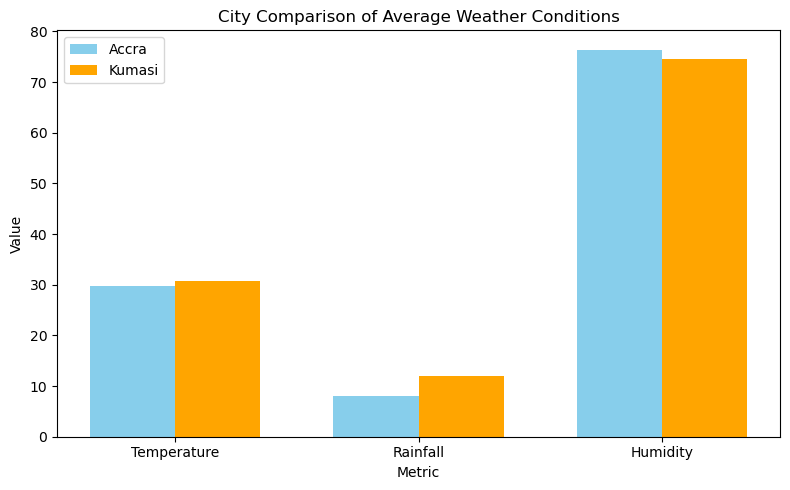

In [32]:
width = 0.35  # width of each bar

plt.figure(figsize=(8, 5))

# Accra bars (shifted left)
plt.bar(x - width/2, transposed_avgs["Accra"], width=width, label="Accra", color="skyblue")

# Kumasi bars (shifted right)
plt.bar(x + width/2, transposed_avgs["Kumasi"], width=width, label="Kumasi", color="orange")
plt.xticks(x, transposed_avgs.index)
plt.title("City Comparison of Average Weather Conditions")
plt.xlabel("Metric")
plt.ylabel("Value")
plt.legend()
plt.tight_layout()

plt.savefig("city_weather_comparison.png", dpi=300)
plt.savefig("city_weather_comparison.pdf")

plt.show()


In [43]:
combined_df["Month"] = combined_df["Date"].dt.strftime("%B")
print(combined_df)

         Date  Temperature  Rainfall  Humidity    City     Month
0  2023-01-01         26.7      11.6      79.2   Accra   January
1  2023-01-11         34.4      12.0      89.6   Accra   January
2  2023-01-21         26.5       5.3      67.8   Accra   January
3  2023-01-31         35.0       5.7      84.1   Accra   January
4  2023-02-10         29.9       5.1      86.1   Accra  February
5  2023-02-20         31.3       6.6      87.7   Accra  February
6  2023-03-02         33.2       2.9      60.1   Accra     March
7  2023-03-12         30.2       3.3      74.1   Accra     March
8  2023-03-22         27.6      19.3      89.4   Accra     March
9  2023-04-01         26.3      19.2      72.0   Accra     April
10 2023-04-11         25.0       3.8      84.4   Accra     April
11 2023-04-21         32.9       0.5      76.4   Accra     April
12 2023-05-01         29.3       4.1      83.1   Accra       May
13 2023-05-11         25.9      14.0      74.5   Accra       May
14 2023-05-21         34.

In [46]:
month_ave = combined_df.groupby(["City", "Month"])[["Temperature", "Rainfall", "Humidity"]].mean()
print(month_ave)

                 Temperature   Rainfall   Humidity
City   Month                                      
Accra  January     30.650000   8.650000  80.175000
       February    30.600000   5.850000  86.900000
       March       30.333333   8.500000  74.533333
       April       28.066667   7.833333  77.600000
       May         29.275000   8.550000  70.275000
       June        29.366667   7.300000  73.233333
Kumasi January     30.275000  12.000000  75.950000
       February    28.200000  14.450000  80.950000
       March       29.133333  10.833333  75.333333
       April       31.200000   8.900000  72.533333
       May         32.175000  12.600000  72.800000
       June        32.433333  13.333333  72.566667


C:\Users\Xps\AppData\Local\Temp\ipykernel_14852\3851189854.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  month_ave = combined_df.groupby(["City", "Month"])[["Temperature", "Rainfall", "Humidity"]].mean()


In [45]:
month_order = ["January", "February", "March", "April", "May", "June"]
combined_df["Month"] = pd.Categorical(
    combined_df["Month"],
    categories=month_order,
    ordered=True
)

In [47]:
month_ave.to_csv("monthly_weather_summary.csv")

In [49]:
temp_data = month_ave.reset_index().pivot(index="Month", columns="City", values="Temperature")
print(temp_data)

City          Accra     Kumasi
Month                         
January   30.650000  30.275000
February  30.600000  28.200000
March     30.333333  29.133333
April     28.066667  31.200000
May       29.275000  32.175000
June      29.366667  32.433333


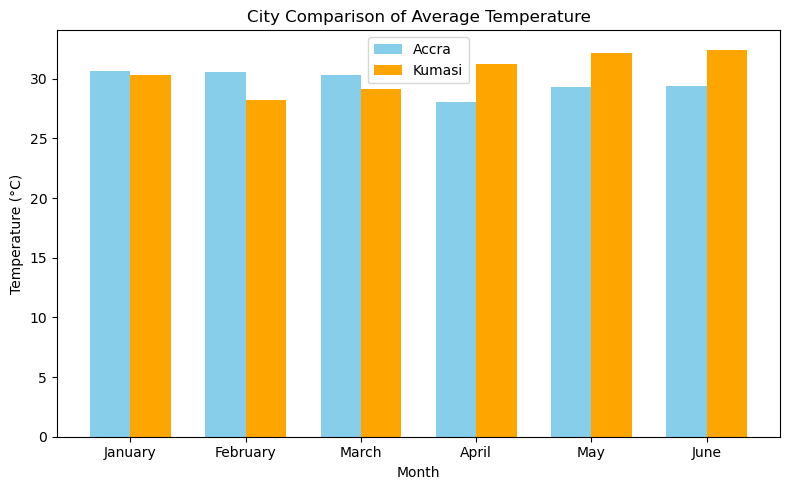

In [69]:
import numpy as np

width = 0.35
b = np.arange(len(temp_data))  # FIXED!

plt.figure(figsize=(8, 5))

# Accra bars
plt.bar(b - width/2, temp_data["Accra"], width=width, label="Accra", color="skyblue")

# Kumasi bars
plt.bar(b + width/2, temp_data["Kumasi"], width=width, label="Kumasi", color="orange")

plt.xticks(b, temp_data.index)
plt.title("City Comparison of Average Temperature")
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.tight_layout()
plt.savefig("city_averagetemp_comparison.png", dpi=300)
plt.savefig("city_averagetemp_comparison.pdf")

plt.show()


In [60]:
rain_data = month_ave.reset_index().pivot(index="Month", columns="City", values="Rainfall")
print(rain_data)

humi_data = month_ave.reset_index().pivot(index="Month", columns="City", values="Humidity")
print(humi_data)

City         Accra     Kumasi
Month                        
January   8.650000  12.000000
February  5.850000  14.450000
March     8.500000  10.833333
April     7.833333   8.900000
May       8.550000  12.600000
June      7.300000  13.333333
City          Accra     Kumasi
Month                         
January   80.175000  75.950000
February  86.900000  80.950000
March     74.533333  75.333333
April     77.600000  72.533333
May       70.275000  72.800000
June      73.233333  72.566667


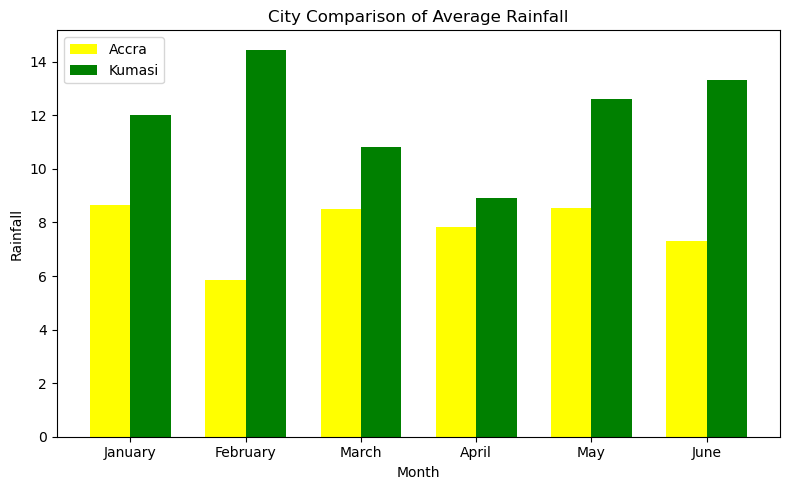

In [70]:
r = np.arange(len(rain_data))
plt.figure(figsize=(8, 5))
plt.bar(r - width/2, rain_data["Accra"], width=width, label="Accra", color="yellow")
plt.bar(r + width/2, rain_data["Kumasi"], width=width, label="Kumasi", color="green")
plt.xticks(r, rain_data.index)
plt.title("City Comparison of Average Rainfall")
plt.xlabel("Month")
plt.ylabel("Rainfall")
plt.legend()
plt.tight_layout()
plt.savefig("city_averagerain_comparison.png", dpi=300)
plt.savefig("city_averagerain_comparison.pdf")

plt.show()

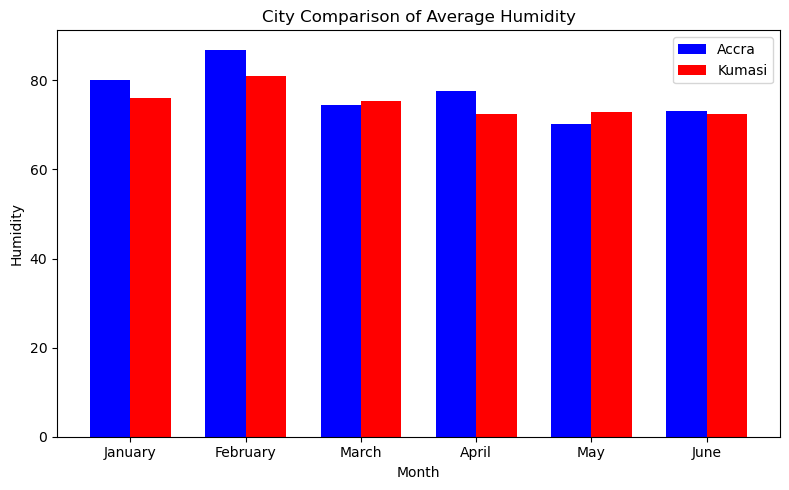

In [71]:
h = np.arange(len(humi_data))
plt.figure(figsize=(8, 5))
plt.bar(h - width/2, humi_data["Accra"], width=width, label="Accra", color="blue")
plt.bar(h + width/2,humi_data["Kumasi"], width=width, label="Kumasi", color="red")
plt.xticks(h, humi_data.index)
plt.title("City Comparison of Average Humidity")
plt.xlabel("Month")
plt.ylabel("Humidity")
plt.legend()
plt.tight_layout()
plt.savefig("city_average_humidity_comparison.png", dpi=300)
plt.savefig("city_average_humidity_comparison.pdf")

plt.show()

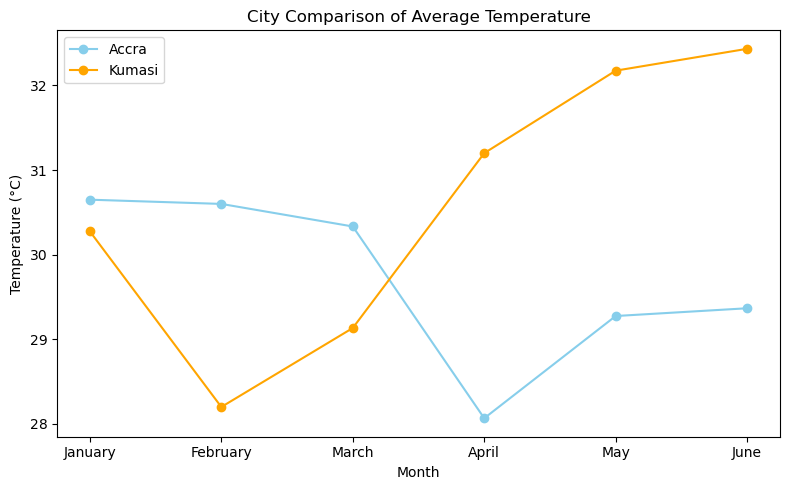

In [72]:
plt.figure(figsize=(8, 5))
plt.plot(temp_data.index, temp_data["Accra"], label="Accra", marker='o', color="skyblue")
plt.plot(temp_data.index, temp_data["Kumasi"], label="Kumasi", marker='o', color="orange")
plt.title("City Comparison of Average Temperature")
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.tight_layout()
plt.savefig("line plot of average temperature of cities.png", dpi=300)
plt.savefig("line plot of average temperature of cities.pdf")

plt.show()

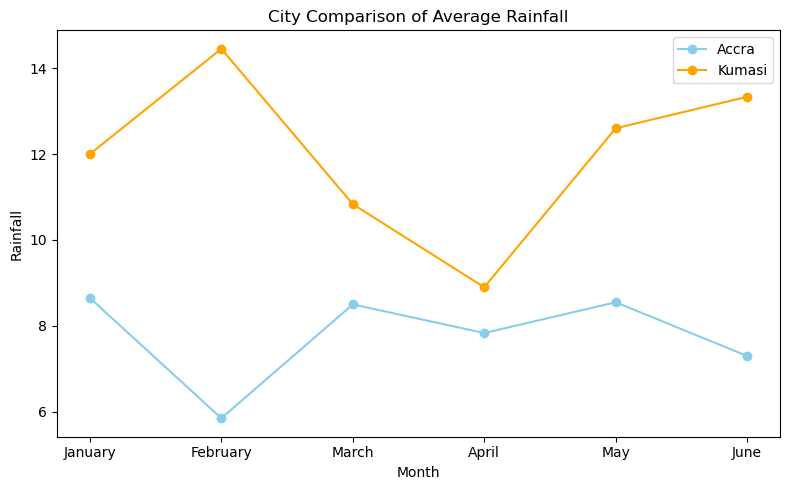

In [73]:
plt.figure(figsize=(8, 5))
plt.plot(rain_data.index, rain_data["Accra"], label="Accra", marker='o', color="skyblue")
plt.plot(rain_data.index, rain_data["Kumasi"], label="Kumasi", marker='o', color="orange")
plt.title("City Comparison of Average Rainfall")
plt.xlabel("Month")
plt.ylabel("Rainfall")
plt.legend()
plt.tight_layout()
plt.savefig("line plot of average rainfall of cities.png", dpi=300)
plt.savefig("line plot of average rainfall of cities.pdf")
plt.show()

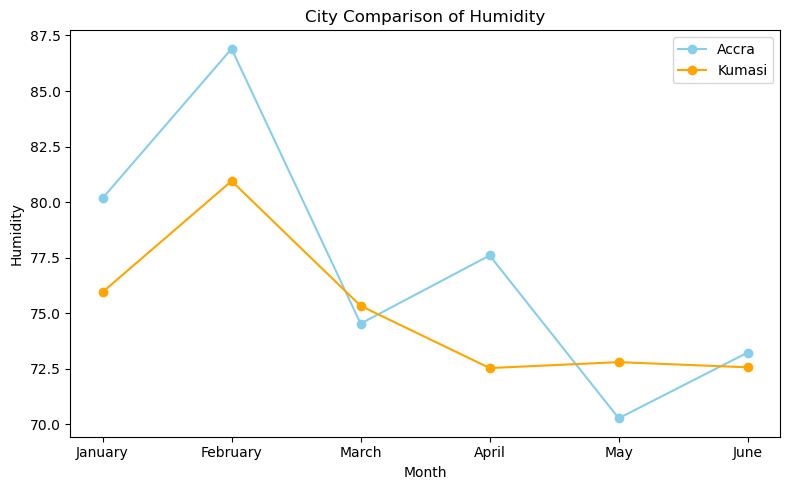

In [74]:
plt.figure(figsize=(8, 5))
plt.plot(humi_data.index, humi_data["Accra"], label="Accra", marker='o', color="skyblue")
plt.plot(humi_data.index, humi_data["Kumasi"], label="Kumasi", marker='o', color="orange")
plt.title("City Comparison of Humidity")
plt.xlabel("Month")
plt.ylabel("Humidity")
plt.legend()
plt.tight_layout()
plt.savefig("line plot of average humidity of cities.png", dpi=300)
plt.savefig("line plot of average humidity of cities.pdf")
plt.show()